# 시작에 앞서 (기본 개념 및 UML 다이어그램)

- class method (cls) 는 생성자  없이 실행할 때
- static method는 객체를 생성 안해도 사용 가능
- __new__는 __init__ 전에 먼저 인스턴스를 생성하고 __init__으로 초기화
- *args = 여러개의 인자를 받기 위해. 튜플 형태 (arguments)
- **kwargs = 딕셔너리 형태를 받을 때 및 특정 키워드를 받고 싶을 때
 (key or keyword)

- UML 클래스 다이어그램 (화살표 방향은 쉽게 말해 없으면 안되는 존재)
 - 일반화 : 상속을 의미
 - 실제화 : 오버라이딩 할 경우
 - 의존 : 클래스간의 참조 (메서드내에서 다른 클래스의 객체를 생성하거나 사용시) 
    - 예를 들면 추상화
 - 연관 : 다른 객체를 참조할때 (둘의 연관관계를 숫자로 표시)
 - 직접 연관 : 연관과 내용은 같으나 추가적으로 방향성을 표시 (A -> B 면 A가 B를 소유)
 - 집합 : Association 관계를 조금 더 특수하게 표현  (방향성은 해도 되고 안해도 됨)
   - whole이 part를 빌려씀.
   - 전체 [whole]를 나타내는 것이 다이아몬드. 부분 [part] 이 그냥 실선)
 - 합성 : Aggregation과 비슷하지만 더 강한 집합을 의미
   - whole이 part를 소유함
 
  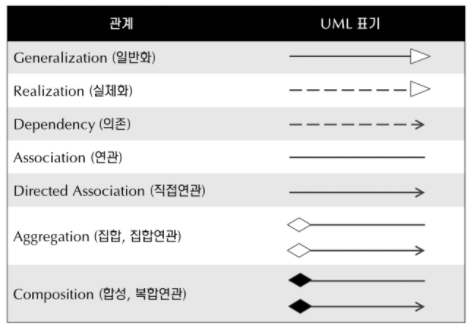
  
 - 참고 ) https://narup.tistory.com/32

# 싱글톤 패턴 구현 (조건을 통해 동시요청의 충동을 막음)

- 싱글톤 패턴은 단 한개의 객체만을 허용하는 패턴
- 동일한 리소스에 대한 동시요청의 충동를 막기위해 사용
- 예를 들면. 객체가 있으면 반환 없으면 미반환 코드 수행

- 단점 : 
1. 모든 클래스 간 상호관계가 복잡해짐  
2. 전역 변수 수정이 의도치 않게 다른 클래스에도 영향을 줌 


- 생성 패턴 : 객체가 생성되는 방식이 중요한거지 생성되는 세부 과정은 숨기고 객체 형태와 독립 구조 지원

## 예시

In [1]:
class Singleton(object):
    def __new__(cls):
        if not hasattr(cls,'instance'):
            cls.instance = super(Singleton, cls).__new__(cls)
        return cls.instance

In [2]:
s = Singleton()
print("Object created", s)
s1 = Singleton()
print("Object created", s1)

Object created <__main__.Singleton object at 0x00000235FEBA4948>
Object created <__main__.Singleton object at 0x00000235FEBA4948>


In [5]:
# class Singleton(object):
#     def __new__(self):
#         if not hasattr(self,'instance'):
#             self.instance = super(Singleton, self).__new__(self)
#         return self.instance
    
# s = Singleton()
# print("Object created", s)
# s1 = Singleton()
# print("Object created", s1)

Object created <__main__.Singleton object at 0x00000235FECFECC8>
Object created <__main__.Singleton object at 0x00000235FECFECC8>


## 게으른 초기화 (조건을 부여)

- 객체를 생성할 때 무조건 불러오는게 아니라, 조건을 부여해서 상황에 맞게 메소드 형태에서 객체를 생성하게끔 만듦
- 싱글톤 패턴은 단 한 개의 객체만 생성

In [1]:
class Singleton:
    __instance = None
    def __init__(self):
        if not Singleton.__instance:
            print("__init__ method called")
        else:
            print("Instance already created:", self.getInstance())
    @classmethod
    def getInstance(cls):
        if not cls.__instance:
            cls.__instance = Singleton()
        return cls.__instance

In [3]:
s = Singleton()
print(s)
print("Object created", Singleton.getInstance())
s1 = Singleton()

__init__ method called
__init__ method called
Object created <__main__.Singleton object at 0x0000021783015888>
Instance already created: <__main__.Singleton object at 0x0000021783015888>


## 모노스테이트 싱글톤 패턴 (같은 상태, 여러 객체. 싱글톤 패턴의 변형)

- 원래는 한 개의 클래스 객체만 존재해야 한다고 말함 
- 하지만 '알렉스 마르텔리' 는 객체의 생성 여부보다는 상태가 더 중요하다고 말함
- 상태가 같다면 같은 상태를 공유할 수 있는 객체를 여러 개 만들 수 있다 

In [3]:
class Borg:
    __shared_state = {"1":"2"}
    def __init__(self):
        self.x = 1
        self.__dict__ = self.__shared_state
        pass
b = Borg()
b1 = Borg()
b.x = 4

print("'b' :", b) #b1과 다른 객체
print("'b1' :", b1)
print("'b' :", b.__dict__) # b1과 같은 결과를 공유
print("'b1' :", b1.__dict__)

'b' : <__main__.Borg object at 0x000001A9FFB4EC88>
'b1' : <__main__.Borg object at 0x000001A9FFB4E988>
'b' : {'1': '2', 'x': 4}
'b1' : {'1': '2', 'x': 4}


## 메타클래스 (메소드 오버라이드의 클래스 버전)

- 메타클래스는 클래스의 클래스 
- 메타클래스 먼저 시행되고 일반 클래스 순서
- 일반 클래스에서 메타클래스를 생성하여 클래스를 재정의 할 수 있다.
- 메소드 오버라이드의 클래스 버전
- 객체를 생성하기 전에 싱글톤 패턴을 메타클레스화 시켜서 진행 가능
- _call_ 메소드는 이미 존재하는 클래스의 객체를 생성할 때 호출하는 파이썬의 특수 메소드
- 메타클래스는 일반 클래스의 init과 new 메소드를 오버라이드함 (재정의 후 사용) 
 

In [8]:
class MyInt(type):
    
    def __call__(cls, *args, **kwds):
        print("***** Here's My int *****", args)
        print("Now do whatever you want with these objects...")
        return type.__call__(cls, *args, **kwds)


class int(metaclass=MyInt):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        print("haha")

i = int(4,5) # 시행하면 메타클래스의 특수메소드를 호출함

# 메타 클레스 먼저 실행 

***** Here's My int ***** (4, 5)
Now do whatever you want with these objects...
haha


In [5]:
#  싱글톤 + 메타클레스
#  객체 생성 여부를 먼저 싱글톤의 메타클레스로  판단한 후 진행 
class MetaSingleton(type):
    _instances = {}
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            cls._instances[cls] = super(MetaSingleton,cls).__call__(*args, **kwargs)
            return cls._instances[cls]
class Logger(metaclass = MetaSingleton):
    pass

logger1 = Logger()
logger2 = Logger()
print(logger1, logger2)

<__main__.Logger object at 0x000001A9FFB1AE08> None


- *args = 여러개의 인자를 받기 위해. 튜플 형태 (arguments)
- **kwargs = 딕셔너리 형태를 받을 때 및 특정 키워드를 받고 싶을 때
 (key or keyword)

## 싱글톤 패턴 사용 사례 1 ( 하나의 웹이 하나의 DB 접속)

- 데이터베이스 기반 애플리케이션에서 싱슬톤 패턴을 적용한 사례
- 웹 앱이 DB 연산을 요청할 때마다 Database 클래스를 생성하지만 내부적으로는 한 개의 객체만 생성
- 따라서 데이터베이스의 동기화가 보장되고 리소스를 적게 사용해 메모리와 CPU의 사용량 최적화 가능
- 그러나 이 경우 각 웹이 DB에 접근하는 싱글톤을 생성하기 때문에 여러 웹을 동기화 할 경우 효율이 안좋음

In [13]:
import sqlite3
# 싱글톤 패던. 객체 생성이 안 돼 있으면 객체 부여. 단 한개의 클래스 객체만 생성
class MetaSingleton(type):
    _instances = {}
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            cls._instances[cls] = super(MetaSingleton,cls).__call__(*args, **kwargs)
            return cls._instances[cls]

class Database(metaclass=MetaSingleton): #메타클래스 먼저 시행함으로써 객체 생성 여부 체크 
    connection = None
    def connect(self):
        if self.connection is None:
            self.connection = sqlite3.connect("db.sqlite3")
            self.cursorobj = self.connection.cursor()
        return self.cursorobj
db1 = Database().connect()
#db2 = Database().connect()

print("Database Objects DB1", db1)
#print("Database Objects DB2", db2)

Database Objects DB1 <sqlite3.Cursor object at 0x000001A981B7CB90>


## 싱글톤 패턴 사용 사례 2 (여러 웹이 같은 DB 접속)

In [6]:
# 싱글톤 구현
class HealthCheck:
    _instance = None
    def __new__(cls, *args, **kwargs):
        if not HealthCheck._instance:
            HealthCheck._instance = super(HealthCheck, cls).__new__(cls, *args, **kwargs)
        return HealthCheck._instance
    def __init__(self):
        self._servers = []
        
    # 서버를 목록에 추가
    def addServer(self):
        self._servers.append("Server 1")
        self._servers.append("Server 2")
        self._servers.append("Server 3")
        self._servers.append("Server 4")
    
    # 서버를 목록에서 제거하고 새로운 서버 추가
    def changeServer(self):
        self._servers.pop()
        self._servers.append("Server 5")

hc1 = HealthCheck()
hc2 = HealthCheck()


hc1.addServer()
print(hc1._servers)
print("Schedule health check for servers (1)..")
for i in range(4):
    print("Checking ", hc1._servers[i])
    
    
hc2.changeServer()
print("Schedule health check for servers (2)..")
for i in range(4):
    print("Checking ", hc2._servers[i])

['Server 1', 'Server 2', 'Server 3', 'Server 4']
Schedule health check for servers (1)..
Checking  Server 1
Checking  Server 2
Checking  Server 3
Checking  Server 4
Schedule health check for servers (2)..
Checking  Server 1
Checking  Server 2
Checking  Server 3
Checking  Server 5


# 팩토리 패턴 (top-down 식으로 클래스 생성)

- 제일 많이 쓰는 디자인 패턴
- 팩토리 패턴이란 다른 클래스의 객체를 생성하는 클래스를 말한다 (ex) a 클래스 하나로 b, c 클래스의 내용까지 표현)
- 예시로 공장이라는 클래스 (a) 에 인형 만드는 기계 (b)가 있었다. 근데 갑자기 가구 만드는 기계 (c)를 추가하기로 했다. c는 간단하게 추가만 하면 됨
- 객체 생성과 클래스 구현을 나눠 상호 의존도를 줄인다
- 간단하게 팩토리에 새로운 클래스 추가 가능

- 추상클래스에서 추상메소드를 구현 할려면 abc 모듈을 import 해야한다.
- 추상클래스란 미완성 설계도. 미완성 메서드 (추상 메서드)를 하나 이상 포함하고 있어야됨.
- 추상클래스 자체로 클래스 역할은 못하지만, 새로운 클래스를 작성하는데 있어바탕이 되는 조상클래스

- 추상메서드란 메서드 중 선언부만 작성하고 구현부는 작성하지 않은 미완성 메서드
- 실제 내용은 상속받은 클래스에서 구현하도록 비워둠 (메소드 오버라이딩 하기 위해)
- 달라질 가능성이 존재하는 메소드를 추상 메소드로 정의. 서브 클레스에서 부모 클레스를 상속받아 추상 메소드를 여러 방면으로 활용 가능 (오버라이딩)

## 심플 팩토리 패턴

- 여러 종류의 객체를 호출하지 않아도 답을 얻을 수 있다

In [9]:
from abc import ABCMeta, abstractmethod

# 부모 클레스
class Animal(metaclass = ABCMeta): #ABCMeta는 파이썬에서 특정 클래스를 Abstract로 선언하는 특수 메타클래스
    @abstractmethod
    def do_say(self):
        pass
    
#자식 클레스
class Dog(Animal): 
    def do_say(self): # 상속받은 클레스에스 추상메소드를 구현해야한다.
        print("Bhow Bhow!!")
        
# 자식 클레스
class Cat(Animal):
    def do_say(self):
        print("Meow Meow!!")
        
## forest factory 정의
class ForestFactory(object):
    def make_sound(self, object_type):
        return eval(object_type)().do_say()
    
##클라이언트 코드
if __name__ == '__main__':
    ff = ForestFactory()
    animal = input("Which animal should make_sound Dog or Cat?")
    ff.make_sound(animal)
    

Which animal should make_sound Dog or Cat?Dog
Bhow Bhow!!


## 팩토리 메소드 구현

- 추상 클래스와 메소드를 활용하여 유연성과 포괄성을 갖춤. 한 클래스에 종속되지 않음
- 객체를 생성하는 코드와 활용하는 코드를 분리해 의존성을 떠러트리며, 이에 따라 유지보수가 용이하다

In [1]:
from abc import ABCMeta, abstractmethod

class Section(metaclass=ABCMeta):
    @abstractmethod
    def describe(self):
        pass

class PersonalSection(Section):
    def describe(self):
        print("Personal Section")
        
class AlbumSection(Section):
    def describe(self):
        print("Album Seciton")

class PatenSection(Section):
    def describe(self):
        print("Patent Section")
        
class PublicationSection(Section):
    def describe(self):
        print("Publication Section")

In [4]:
class Profile(metaclass=ABCMeta):
    def __init__(self):
        self.sections = []
        self.createProfile()
    @abstractmethod
    def createProfile(self):
        pass
    def getSections(self):
        return self.sections
    def addSections(self, section):
        self.sections.append(section)
        
class linkedin(Profile):
    def createProfile(self):
        self.addSections(PersionalSection())
        self.addSections(PatentSection())
        self.addSections(PublicationSection())
    
class facebook(Profile):
    def createProfile(self):
        self.addSections(PersonalSection())
        self.addSections(AlbumSection())
        
if __name__ == '__main__':
    profile_type = input("Which Profile you'd like to create? [LinkeIn or FaceBook]")
    profile = eval(profile_type.lower())()
    print("Creating Profile..", type(profile).__name__)
    print("Profile has sections --", profile.getSections())

Which Profile you'd like to create? [LinkeIn or FaceBook]facebook
Creating Profile.. facebook
Profile has sections -- [<__main__.PersonalSection object at 0x00000253FBDB5EC8>, <__main__.AlbumSection object at 0x00000253FBDE1048>]


##  추상 팩토리 패턴

- 팩토리 메소드가 인스턴스 생성을 서브 클래스에게 맡기는 반면 추상 팩토리 메소드는 관련된 객체의 집합을 생성
- 인터페이스를 통해서 객체에 접근
- 그러나 실제 생성은 서브 클래스가 담당

In [1]:
from abc import ABCMeta, abstractmethod

class PizzaFactory(metaclass=ABCMeta):
    
    @abstractmethod
    def createVegPizza(self):
        pass
    
    @abstractmethod
    def createNonVegPizza(self):
        pass
    
class IndianPizzaFactory(PizzaFactory):
    
    def createVegPizza(self):
        return DeluxVeggiePizza()
    
    def createNonVegPizza(self):
        return ChickenPizza()

class USPizzaFactory(PizzaFactory):
    
    def createVegPizza(self):
        return MexicanVegPizza()
    
    def createNonVegPizza(self):
        return HamPizza()

In [2]:
class VegPizza(metaclass=ABCMeta):
    @abstractmethod
    def prepare(self, VegPizza):
        pass
    
class NonVegPizza(metaclass=ABCMeta):
    @abstractmethod
    def serve(self, VegPizza):
        pass
    
class DeluxVeggiePizza(VegPizza):
    def prepare(self):
        print("Prepare", type(self).__name__)
        
class ChickenPizza(NonVegPizza):
    def serve(self, VegPizza):
        print(type(self).__name__, "is served with Chicken on", type(VegPizza).__name__)

class MexicanVegPizza(VegPizza):
    def prepare(self):
        print("Prepare", type(self).__name__)
        
class HamPizza(NonVegPizza):
    def serve(self, VegPizza):
        print(type(self).__name__, "is served with Ham on", type(VegPizza).__name__)

In [6]:
class PizzaStore:
    def __init__(self):
        pass
    
    def makePizzas(self):
        for factory in [IndianPizzaFactory(), USPizzaFactory()]:
            self.factory = factory #IndianPizzaFactory() 객체 생성
            self.NonVegPizza = self.factory.createNonVegPizza() #IndianPizzaFactory() 의 createNonVegPizza() 메소드 불러옴 -> ChickenPizza() 리턴
            self.VegPizza = self.factory.createVegPizza() # IndianPizzaFactory() 의 createVegPizza() 메소드 불러옴 ->  DeluxVeggiePizza() 리턴
            self.VegPizza.prepare() #DeluxVeggiePizza() 클레스의 prepare 메소드 불러옴 
            self.NonVegPizza.serve(self.VegPizza) # #ChickenPizza() 클레스의 serve 메소드 불러옴 
            print('##############')
            
pizza = PizzaStore()
pizza.makePizzas()

Prepare DeluxVeggiePizza
ChickenPizza is served with Chicken on DeluxVeggiePizza
##############
Prepare MexicanVegPizza
HamPizza is served with Ham on MexicanVegPizza
##############


# 퍼사드 디자인 패턴 (face에 더 집중. 웨딩플레너)

- 퍼사드 디자인 패턴은 facode 로 얼굴 처럼 내부보다 외관에 신경
- 복잡한 내부 시스템 로직을 감추고 클라이언트가 쉽게 시스템을 접근할 수 있는 인터페이스를 제공
- 단일 인터페이스 객체로 복잡한 서브시스템을 대체
- 외부에서 보기에 깔끔하도록 복잡한 서브시스템을 감싼다
- 클라이언트가 특정 작업을 수행할 때 모든 관련 서브시스템에 요청하지 않고 메인 인터페이스(퍼사드)에만 요청

- 구조 패턴 : 구조를 간소화하고 클래스와 객체 사이의 관계를 찾는 것이 주 목적

- 예시로 웨딩플레너 (퍼사드) 에게 부탁하면 결혼 준비 다 해줌
- 클라이언트 : 본인
- 퍼사드 : 웨딩플레너
- 서브시스템 : 음식, 꽃 장식 등등 담당하는 업체

In [7]:
#퍼사드 클래스
class EventManager(object):
    
    def __init__(self):
        print("Event Manager:: Let me talk to the folks\n")
    
    def arrange(self):
        self.hotelier = Hotelier()
        self.hotelier.bookHotel()
        
        self.florist = Florist()
        self.florist.setFlowerRequirements()
        
        self.caterer = Caterer()
        self.caterer.setCuisine()
        
        self.musician = Musician()
        self.musician.setMusicType()

In [8]:
#서브클래스
class Hotelier(object):
    
    def __init__(self):
        print("Arranging the Hotel for Marriage? --")
    
    def __isAvailable(self):
        print("Is the Hotel free for the event on given day?")
        return True
    
    def bookHotel(self):
        if self.__isAvailable():
            print("Registered the Booking\n\n")


class Florist(object):
    
    def __init__(self):
        print("Flower Decorations for the Event? --")
    
    def setFlowerRequirements(self):
        print("Carnations, Roses and Lilies would be used for Decorations\n\n")


class Caterer(object):
    
    def __init__(self):
        print("Food Arrangements for the Event --")
    
    def setCuisine(self):
        print("Chinese & Continental Cuisine to be served\n\n")

class Musician(object):
    
    def __init__(self):
        print("Musical Arrangements for the Marriage --")
    
    def setMusicType(self):
        print("Jazz and Classical will be played\n\n")

In [9]:
#클라이언트
class You(object):
    
    def __init__(self):
        print("You:: Whoa! Marriage Arrangements??!!!")
    
    def askEventManager(self):
        print("You:: Let's Contact the Event Manager\n\n")
        em = EventManager()
        em.arrange()
    
    def __del__(self):
        print("You:: Thanks to Event Manager, all preparations done! Phew!")

you = You()
you.askEventManager()

You:: Whoa! Marriage Arrangements??!!!
You:: Let's Contact the Event Manager


Event Manager:: Let me talk to the folks

Arranging the Hotel for Marriage? --
Is the Hotel free for the event on given day?
Registered the Booking


Flower Decorations for the Event? --
Carnations, Roses and Lilies would be used for Decorations


Food Arrangements for the Event --
Chinese & Continental Cuisine to be served


Musical Arrangements for the Marriage --
Jazz and Classical will be played




# 프록시 디자인 패턴 (proxy = 대리인)

- 영화 제작사(클라이언트)가 배우한테 직접 접근하지 않고 에이전트(프록시) 를 통해서 연락함
- 웹 관점에서는 클라이언트가 웹사이트에 접송하면 프록시 서버에 웹페이지 등의 리소스를 요청.
  프록시 서버는 요청을 철하여 클라이언트에 다시 전달
- 프록시와 퍼사드는 비슷하지만 프록시는 객체 사이의 중재자 역할. 퍼사드는 하나의 통합된 간단한 인터페이스

In [1]:
# 예시1)
class Actor(object):
    
    def __init__(self):
        self.isBusy = False
    
    def occupied(self):
        self.isBusy = True
        print(type(self).__name__ , "is occupied with current movie")
    
    def available(self):
        self.isBusy = False
        print(type(self).__name__ , "is free for the movie")
    
    def getStatus(self):
        return self.isBusy

class Agent(object):
    
    def __init__(self):
        self.principal = None
    
    def work(self):
        self.actor = Actor()
        if self.actor.getStatus():
            self.actor.occupied()
        else:
            self.actor.available()


if __name__ == '__main__':
    r = Agent()
    r.work()

Actor is free for the movie


In [6]:
#예시 2) 백화점에서 현금 카드로 결제시..
from abc import ABCMeta, abstractmethod

class Payment(metaclass=ABCMeta):
    
    @abstractmethod
    def do_pay(self):
        pass

#Payment의 인터페이스
class Bank(Payment):
    
    def __init__(self):
        self.card = None
        self.account = None
    
    def __getAccount(self): # 카드 소지자의 계좌 정보를 조회하는 메소드. 카드 번호화 계좌 번호 같게 구현
        self.account = self.card # Assume card number is account number
        return self.account
    
    def __hasFunds(self): # 충분한 돈이 있는지 확인 
        print("Bank:: Checking if Account", self.__getAccount(), "has enough funds")
        return False
    
    def setCard(self, card): #카드 정보를 은행에 전달
        self.card = card
    
    def do_pay(self): #상황에 따라 판매자에게 지불
        if self.__hasFunds():
            print("Bank:: Paying the merchant")
            return True
        else:
            print("Bank:: Sorry, not enough funds!")
            return False

#proxy
class DebitCard(Payment): #Bank의 대리 객체
    
    def __init__(self):
        self.bank = Bank()
     
    def do_pay(self): #클라이언트가 결제 요청하면 호출
        card = input("Proxy:: Punch in Card Number: ")
        self.bank.setCard(card)
        return self.bank.do_pay()

class You: #클라이언트
    
    def __init__(self):
        print("You:: Lets buy the Denim shirt")
        self.debitCard = DebitCard()
        self.isPurchased = None
    
    def make_payment(self): # 셔츠를 결제
        self.isPurchased = self.debitCard.do_pay()
    
    def __del__(self): #결제 성공 시 호출
        if self.isPurchased:
            print("You:: Wow! Denim shirt is Mine :-)")
        else:
            print("You:: I should earn more :(")

you = You()
you.make_payment()

You:: Lets buy the Denim shirt
You:: I should earn more :(
Proxy:: Punch in Card Number: 23-2134-222
Bank:: Checking if Account 23-2134-222 has enough funds
Bank:: Sorry, not enough funds!


# 옵서버 디자인 패턴 (옵서버 = 자식 / 유투브 알림)

- 행위 패턴 : 객체의 역할에 초점을 둠.  더 큰 기능을 구현하기 위해 객체 간의 상호 작용을 중시
- 객체(서브젝트)는 자식(옵서버)을 모니터링, 관리
- 옵서버는 서브젝트의 상태에 따라 자신의 객체 상태를 변경하거나 필요한 연산을 수행 (1:N 관계)
- 예를 들면 유투브 채널은 서브젝트, 구독자는 옵서버. 유투브 채널에 글이 올라오면 알림을 통해 구독자가 소식을 전해들음
- 옵서버 디자인 패턴에서 push는 통보 (서브젝트가 옵저버), pull은 부탁 (옵저버가 서브젝트)
- 옵서버의 잠점은 느슨한 결합 원칙을 따름
  - 서브젝트와 옵서버가 서로 독립적이며, 때문에 옵서버는  필요 시 어디에서도 재사용 및 추가 가능

In [1]:
# 예제
class Subject:
    
    def __init__(self):
        self.__observers = []
    
    def register(self, observer):
        self.__observers.append(observer)
    
    def notifyAll(self, *args, **kwargs):
        for observer in self.__observers:
            observer.notify(self, *args, **kwargs)


class Observer1:
    
    def __init__(self, subject):
        subject.register(self)
    
    def notify(self, subject, *args):
        print(type(self).__name__,':: Got', args, 'From', subject)

class Observer2:
    
    def __init__(self, subject):
        subject.register(self)
    
    def notify(self, subject, *args):
        print(type(self).__name__, ':: Got', args, 'From', subject)


subject = Subject()
observer1 = Observer1(subject)
observer2 = Observer2(subject)
subject.notifyAll('notification')

Observer1 :: Got ('notification',) From <__main__.Subject object at 0x00000116CA49DA88>
Observer2 :: Got ('notification',) From <__main__.Subject object at 0x00000116CA49DA88>


In [2]:
# 사용 사례 (서브젝트)
class NewsPublisher: #구독자가 구현할 인터페이스 제공
    
    def __init__(self):
        self.__subscribers = []
        self.__latestNews = None
    
    def attach(self, subscriber): #구독자가 등록
        self.__subscribers.append(subscriber)
    
    def detach(self): #구독자가 등록 취소
        return self.__subscribers.pop()
    
    def subscribers(self): #구독자 목록 반환
        return [type(x).__name__ for x in self.__subscribers]
    
    def notifySubscribers(self): #등록된 구독자에게 알림을 보냄
        for sub in self.__subscribers:
            sub.update()
    
    def addNews(self, news): #뉴스게시자 뉴스 등록
        self.__latestNews = news
    
    def getNews(self): #뉴스게시자가 최신 뉴스를 확인  뒤 옵저버로 보냄
        return "Got News:", self.__latestNews


from abc import ABCMeta, abstractmethod

#(옵저버) 인터페이스
class Subscriber(metaclass=ABCMeta): 
    
    @abstractmethod
    def update(self): #서브젝트로부터 새로운 뉴스 알림을 받음
        pass


#Subscriber의 옵저버
class SMSSubscriber: # Subscriber 클레스 인터페이스 구현
    
    def __init__(self, publisher):
        self.publisher = publisher
        self.publisher.attach(self)
    
    def update(self):
        print(type(self).__name__, self.publisher.getNews())

class EmailSubscriber:
    
    def __init__(self, publisher):
        self.publisher = publisher
        self.publisher.attach(self)
    
    def update(self):
        print(type(self).__name__, self.publisher.getNews())

class AnyOtherSubscriber:
    
    def __init__(self, publisher): #attach 메소드를 통해 NewsPublisher에 등록
        self.publisher = publisher
        self.publisher.attach(self)
    
    def update(self):
        print(type(self).__name__, self.publisher.getNews())


if __name__ == '__main__':
    news_publisher = NewsPublisher()
    
    for Subscribers in [SMSSubscriber, EmailSubscriber, AnyOtherSubscriber]:
        Subscribers(news_publisher) #초기화 후 본인을 구독자로 등록
        print("\nSubscribers:", news_publisher.subscribers()) #구독자 리스트 출력
        
        news_publisher.addNews('Hello World!') #뉴스 등록
        news_publisher.notifySubscribers()  #구독자에게 뉴스 전달
        
        print("\nDetached:", type(news_publisher.detach()).__name__)
        print("\nSubscribers:", news_publisher.subscribers()) #구독자를 목록에서 제거
        
        news_publisher.addNews('My second news!')
        news_publisher.notifySubscribers()


Subscribers: ['SMSSubscriber']
SMSSubscriber ('Got News:', 'Hello World!')

Detached: SMSSubscriber

Subscribers: []

Subscribers: ['EmailSubscriber']
EmailSubscriber ('Got News:', 'Hello World!')

Detached: EmailSubscriber

Subscribers: []

Subscribers: ['AnyOtherSubscriber']
AnyOtherSubscriber ('Got News:', 'Hello World!')

Detached: AnyOtherSubscriber

Subscribers: []


# 커맨드 디자인 패턴 (증권사) - 요청 패턴화

- 객체가 기능을 수행하는 모든 정보들을 캡슐화 하는 행동 패턴
- 작업을 요청하는 클래스와 수행하는 클래스를 분리
- 큐에 커맨드를 순서대로 저장
- 독립적인 클래스가 많으므로 구현 및 유지보수해야 되는 클래스가 많다.
- 증권사를 예를들어 고객이 요구하면 (command) 중개사 (invoker)는 고객의 요청을 받아 (ConcreteCommand) 캡슐화해 큐에 넣음
- 이후, 거래하는 어플을 통해 요청을 처리 (Receiver)  

In [1]:
#예제
class Wizard():
    
    def __init__(self, src, rootdir):
        self.choices = []
        self.rootdir = rootdir
        self.src = src
    
    def preferences(self, command): # 각 단계에 사용자가 선택한 정보를 저장
        self.choices.append(command)
    
    def execute(self):
        for choice in self.choices:
            if list(choice.values())[0]:
                print("Copying binaries --", self.src, " to ", self.rootdir)
            else:
                print("No Operation")
    
    def rollback(self):
        print("Deleting the unwanted..", self.rootdir)


if __name__ == '__main__':
    ## Client code
    wizard = Wizard('python3.5.gzip', '/usr/bin/')
    ## Steps for installation. ## Users chooses to install Python only
    wizard.preferences({'python':True})
    wizard.preferences({'java':False})
    wizard.execute()

Copying binaries -- python3.5.gzip  to  /usr/bin/
No Operation


In [2]:
# 예제 2
# 클라이언트는 특정 연산 요청
# invoker(중개사)는 요청을 받아  캡슐화에 큐에 넣음
# ConcreteCommand 클래스는 이 요청을 책임지고 Receiver에 수행을 맡김

from abc import ABCMeta, abstractmethod
class Command(metaclass=ABCMeta): #고객의 요구
    def __init__(self, recv):
        self.recv = recv #Receiver() 객체의 함수를 호출
    
    def execute(self):
        pass

class ConcreteCommand(Command): #요청 수행
        
    def __init__(self, recv):
        self.recv = recv
    
    def execute(self):
        self.recv.action()

class Receiver: #요청을 처리
    
    def action(self):
        print("Receiver Action")

class Invoker: #중개사
    
    def command(self, cmd):
        self.cmd = cmd
    
    def execute(self):
        self.cmd.execute()

if __name__ == '__main__':
    recv = Receiver()
    cmd = ConcreteCommand(recv)
    invoker = Invoker()
    invoker.command(cmd)
    invoker.execute()


Receiver Action


In [3]:
# 커맨드 패턴의 실제 활용 사례 : 증권거래소
from abc import ABCMeta, abstractmethod

class Order(metaclass=ABCMeta): # 고객 주문 (클라이언트)
    
    @abstractmethod
    def execute(self):
        pass

class StockTrade: # 요청을 처리
    
    def buy(self):
        print("You will buy stocks")
    
    def sell(self):
        print("You will sell stocks")

class Agent: #펀드매니저
    
    def __init__(self):
        self.__orderQueue = [] #모든 신규 주문은 큐에 추가
    
    def placeOrder(self, order):
        self.__orderQueue.append(order)
        order.execute()

class BuyStockOrder(Order): #요청 수행 : 주식 매수
    
    def __init__(self, stock):
        self.stock = stock
    
    def execute(self):
        self.stock.buy()

class SellStockOrder(Order): #요청 수행 : 주식 매도
    
    def __init__(self, stock):
        self.stock = stock
    
    def execute(self):
        self.stock.sell()


if __name__ == '__main__':
    #Client
    stock = StockTrade()
    buyStock = BuyStockOrder(stock)
    sellStock = SellStockOrder(stock)
    
    #Invoker
    agent = Agent()
    agent.placeOrder(buyStock)
    agent.placeOrder(sellStock)


You will buy stocks
You will sell stocks


# 템플릿 디자인 패턴 (커피와 차)- 알고리즘의 캡슐화

- 템플릿 메소드 디자인 패턴은 코드의 중복을 최소화
- 여러 알고리즘의 클래스가 비슷하거나 같은 로직을 구현할 때 활용
- 서브클래스를 오버라이드해 여러 알고리즘을 구현할 수 있는 경우 사용
- 예를 들면 커피를 끓이는 순서와 차를 끓이는 순서는 흡사하다고 볼 수 있음.
- 모든 iOS 기기에서 사용할 수 있는 크로스 컴파일러를 만들 때 템플릿 메소드 패턴이 적합
- 단점으로는 디버깅이 어렵고 필요없는 메소드를 구성할 수 도 있다. 유지보수가 까다롭다.

In [2]:
# 예시 1 
from abc import  ABCMeta, abstractmethod

class Compiler(metaclass=ABCMeta):
    @abstractmethod
    def collectSource(self): #바이너리 형태의 오브젝트 코드로 컴파일하는 추상 메소드
        pass

    @abstractmethod
    def compileToObject(self): #바이너리 형태의 오브젝트 코드로 컴파일하는 추상 메소드
        pass

    @abstractmethod
    def run(self): #컴파일된 프로그램을 실행하는 메소드
        pass

    def compileAndRun(self): #추상 메소드 메소드 호출
        self.collectSource()
        self.compileToObject()
        self.run()

class iOSCompiler(Compiler): #추상 메소드를 구현
    def collectSource(self):
        print("Collecting Swift Source Code")

    def compileToObject(self):
        print("Compiling Swift code to LLVM bitcode")

    def run(self):
        print("Program runing on runtime environment")


iOS = iOSCompiler()
iOS.compileAndRun()


Compiling Swift code to LLVM bitcode
Program runing on runtime environment


In [3]:
from abc import ABCMeta, abstractmethod

class AbstractClass(metaclass=ABCMeta):
    def __init__(self):
        pass

    @abstractmethod
    def operation1(self):
        pass

    @abstractmethod
    def operation2(self):
        pass

    def template_method(self):
        print("Defining the Algorithm. Operation1 follows Operation2")
        self.operation2()
        self.operation1()


class ConcreteClass(AbstractClass):

    def operation1(self):
        print("My Concrete Operation1")

    def operation2(self):
        print("Operation 2 remains same")


class Client:
    def main(self):
        self.concreate = ConcreteClass()
        self.concreate.template_method()

client = Client()
client.main()

Defining the Algorithm. Operation1 follows Operation2
Operation 2 remains same
My Concrete Operation1


In [4]:
# 사용 사례 : 여행사 (같은 여행지라도 고객의 요구에 따라 일정 등을 바꿀 수 있음)
from abc import abstractmethod, ABCMeta

class Trip(metaclass=ABCMeta):
    
    @abstractmethod
    def setTransport(self): #교통 수단
        pass
    
    @abstractmethod 
    def day1(self): #첫 날 일정
        pass
    
    @abstractmethod
    def day2(self): #두 번째날 일정
        pass
    
    @abstractmethod
    def day3(self): #세 번째날 일정
        pass
    
    @abstractmethod
    def returnHome(self): #돌아오는 일정
        pass
    
    def itinerary(self): #여행 일정 정의
        self.setTransport()
        self.day1()
        self.day2()
        self.day3()
        self.returnHome()

class VeniceTrip(Trip): #베니스 여행
    
    def setTransport(self): #교통 수단을 지정
        print("Take a boat and find your way in the Grand Canal")
    
    def day1(self): #일별 일정 설정
        print("Visit St Mark's Basilica in St Mark's Square")
     
    def day2(self): #일별 일정 설정
        print("Appreciate Doge's Palace")
    
    def day3(self): #일별 일정 설정
        print("Enjoy the food near the Rialto Bridge")
    
    def returnHome(self): #돌아오는날 일정 설정
        print("Get souvenirs for friends and get back")


class MaldivesTrip(Trip): #몰디브 여행
    
    def setTransport(self):
        print("On foot, on any island, Wow!")
    
    def day1(self):
        print("Enjoy the marine life of Banana Reef")
    
    def day2(self):
        print("Go for the water sports and snorkelling")
    
    def day3(self):
        print("Relax on the beach and enjoy the sun")
    
    def returnHome(self):
        print("Dont feel like leaving the beach..")


class TravelAgency: #여행 대행사
    
    def arrange_trip(self):
        choice = input("What kind of place you'd like to go historical or to a beach?")
        if choice == 'historical':
            self.venice = VeniceTrip() 
            self.venice.itinerary() #여행 일정 생성
        if choice == 'beach':
            self.maldives = MaldivesTrip()
            self.maldives.itinerary()


TravelAgency().arrange_trip()


What kind of place you'd like to go historical or to a beach?beach
On foot, on any island, Wow!
Enjoy the marine life of Banana Reef
Go for the water sports and snorkelling
Relax on the beach and enjoy the sun
Dont feel like leaving the beach..


# 컴파운드(MVC) 디자인 패턴

- 말 그대로 두 개이상의  패턴을 합쳐 문제를 해결 (MVC 패턴은 가장 많이 쓰이는 컴파운드 패턴 중 하나)
- MVC란 model (비즈니스 로직), view (시각) , controller (요청 처리) 합성어
- model : 비즈니스 로직은 정보 저장 및 쿼리 처리 (CRUD 작업) 
- view는 사람들이 보는 홈페이지 같은 것
- controller는 model과 view의 요청을 처리
- MVC 패턴을 사용하면 유지보수가 쉽다
- 백앤드 로직을 건드리지 않고 독립적으로 프론트앤드를 수정 가능

In [1]:
#클라우드 서비스 업체 홍보 어플리케이션 구현 예시 
class Model(object): #DB
    services = {
        'email': {'number': 1000, 'price': 2,},
        'sms': {'number': 1000, 'price': 10,},
        'voice': {'number': 1000, 'price': 15,},
    }

class View(object): #모든 서비스와 이용 요금 출력
    def list_services(self, services):
        for svc in services:
            print(svc, ' ')

    def list_pricing(self, services):
            for svc in services:
                print("For" , Model.services[svc]['number'],
                      svc, "message you pay $",
                      Model.services[svc]['price'])


class Controller(object): #model에 요청 후 view에 뿌림 
    def __init__(self):
        self.model = Model()
        self.view = View()

    def get_services(self):
        services = self.model.services.keys()
        return(self.view.list_services(services))

    def get_pricing(self):
        services = self.model.services.keys()
        return(self.view.list_pricing(services))

class Client(object):
    controller = Controller()
    print("Services Provided:")
    controller.get_services()

    print("Pricing for Services:")
    controller.get_pricing()

Services Provided:
email  
sms  
voice  
Pricing for Services:
For 1000 email message you pay $ 2
For 1000 sms message you pay $ 10
For 1000 voice message you pay $ 15


In [2]:
class Model(object):
    def logic(self):
        data = 'Got it!'
        print("Model: Crunching data as per business logic")
        return data

class View(object):
    def update(self, data):
        print("View: Updating the view with results: ", data)


class Controller(object):
    def __init__(self):
        self.model = Model()
        self.view = View()

    def interface(self):
        print("Controller: Relayed the Cient asks")
        data = self.model.logic()
        self.view.update(data)

class Client(object):
    print("Client: asks for certain information")
    controller = Controller()
    controller.interface()

Client: asks for certain information
Controller: Relayed the Cient asks
Model: Crunching data as per business logic
View: Updating the view with results:  Got it!


In [4]:
## 웹 홈페이지 구현 사례 (필요한 파일이 없으므로 작동 안됨)
# import tornado #웹 애플리케이션 프레임워크
# import tornado.web
# import tornado.ioloop
# import tornado.httpserver
# import sqlite3

# def _execute(query): # SQLite 쿼리를 인자로 받아 SQL 연산을 수행
#     """ Method to run query on sqlite db """
#     dbPath = 'db'
#     connection = sqlite3.connect(dbPath) #SQL DB 연결
#     cursorobj = connection.cursor() #커서 객체 생성
#     try:
#         cursorobj.execute(query)
#         result = cursorobj.fetchall() #커서 객체를 활용하여 트렌젝션 처리
#         connection.commit()  #쿼리 커밋
#     except Exception:
#             raise
#     connection.close() #DB 접속 종료
#     return result

# class IndexHandler(tornado.web.RequestHandler): #model- db select
#     """ Home Page """
#     def get(self):
#         query = "select * from task"
#         todos = _execute(query)
#         self.render('index.html', todos=todos) #index.html - 모든 일정을 나열하는 템플릿

# class NewHandler(tornado.web.RequestHandler): #model - db insert
#     """ Add a task to teh task list """
#     def post(self):
#         name = self.get_argument('name', None)
#         query = "create table if not exists task (id INTEGER PRIMARY KEY, name TEXT, status NUMERIC) "
#         _execute(query)
#         query = "insert into task (name, status) values ('%s', %d) " %(name, 1)
#         _execute(query)
#         self.redirect('/')

#     def get(self):
#         self.render('new.html') #new.html - 새로운 일정을 생성하는 템플릿 /base.html은 그 외의 템플릿이 상속받는 베이스 템플릿 (챰고)

# class UpdateHandler(tornado.web.RequestHandler): #model- db update
#     """ Update status of the task to Open/Closed"""
#     def get(self, id, status):
#         query = "update task set status=%d where id=%s" %(int(status), id)
#         _execute(query)
#         self.redirect('/')

# class DeleteHandler(tornado.web.RequestHandler): #model- db delete
#     """ Delete task from task list """
#     def get(self, id):
#         query = "delete from task where id=%s" % id
#         _execute(query)
#         self.redirect('/')

# class RunApp(tornado.web.Application):  #컨트롤러
#     """ Configuration to run the App """
#     def __init__(self):
#         Handlers = [
#             (r'/', IndexHandler),
#             (r'/todo/new', NewHandler), #새로운 일정을 생성하는 경로
#             (r'/todo/update/(\d+)/status/(\d+)', UpdateHandler), #일정의 상태를 변경하는 경로
#             (r'/todo/delete/(\d+)', DeleteHandler),#완료된 일정을 삭제하는 경로
#         ]
#         settings = dict(
#             debug=True,
#             template_path='templates',
#             static_path="static",
#         )
#         tornado.web.Application.__init__(self, Handlers, **settings)

# if __name__ == '__main__':
#     http_server = tornado.httpserver.HTTPServer(RunApp())
#     http_server.listen(5000)
#     tornado.ioloop.IOLoop.instance().start()

RuntimeError: This event loop is already running

# 상태 디자인 패턴 (기능-컴퓨터-고객)

- 커맨드와 템플릿 디자인 패턴과 마찬가지로 행위 패턴의 한 종류
- 객체의 역할에 중점을 두며, 객체는 내부 상태에 따라 여러 행위를 캡슐화 함
- 너무 많은 ConcreteState의 (기능) class 들이 생겨나면 context (컴퓨터) 가 과부화됨 


In [6]:
# 예제1
from abc import abstractmethod, ABCMeta

class State(metaclass=ABCMeta): # 객체의 행위를 캡슐화하는 인터페이스
    @abstractmethod
    def Handle(self):
        pass

# ConcreteState - 인터페이스를 구현하는 서브클래스 (객체의 행위를 구현)
class ConcreteStateB(State):
    def Handle(self):
        print("ConcreteStateB")

class ConcreteStateA(State):
    def Handle(self):
        print("ConcreteStateA")

class Context(State): #사용자가 선택한 인터페이스를 정의
    
    def __init__(self):
        self.state = None
    
    def getState(self):
        return self.state
    
    def setState(self, state):
        self.state = state
    
    def Handle(self):
        self.state.Handle()


context = Context()
stateA = ConcreteStateA()
stateB = ConcreteStateB()

context.setState(stateA)
context.Handle()


ConcreteStateA


In [5]:
#예제2
from abc import abstractmethod, ABCMeta

class State(metaclass=ABCMeta): 
    @abstractmethod
    def doThis(self): #티비를 켜고 끄는 메소드
        pass

class StartState (State): #티비 키는 상태를 구현 (ConcreteClass)
    def doThis(self):
        print("TV Switching ON..")

class StopState (State): #티비 키는 상태를 구현 (ConcreteClass)
    def doThis(self):
        print("TV Switching OFF..")

class TVContext(State): #현재 상태 저장. ConcreteClass에 요청을 전달 
    
    def __init__(self):
        self.state = None
    
    def getState(self):
        return self.state
    
    def setState(self, state):
        self.state = state
    
    def doThis(self):
        self.state.doThis()


context = TVContext()
context.getState()
start = StartState()
stop = StopState()

context.setState(stop)
context.doThis()

TV Switching OFF..


In [23]:
# 사용 예제 
class ComputerState(object):
    name = "state" #컴퓨터의 객체 상태
    allowed = [] #컴퓨터 상태의 목록
    
    def switch(self, state): #컴퓨터의 상태를 변경
        if state.name in self.allowed:
            print('Current:',self,' => switched to new state',state.name)
            self.__class__ = state #__class__는 자신의 클래스를 참조할 때 사용 -> 맨 처음에 off에서 on으로 바꿈 
        else:
            print('Current:',self,' => switching to',state.name,'not possible.')
    
    def __str__(self):
        return self.name


class Off(ComputerState): #컴퓨터 끔
    name = "off"
    allowed = ['on']

class On(ComputerState): #컴퓨터 켬 
    name = "on"
    allowed = ['off','suspend','hibernate']

class Suspend(ComputerState): #컴퓨터를 일시 중지
    name = "suspend"
    allowed = ['on']

class Hibernate(ComputerState): #컴퓨터를 절전 상태로 설정
    name = "hibernate"
    allowed = ['on']


class Computer(object):
    def __init__(self, model='HP'):
        self.model = model
        self.state = Off()
    
    def change(self, state): #컴퓨터의 상태를 변경 
        self.state.switch(state)


if __name__ == "__main__": #클라이언트 
    comp = Computer()
    # Switch on
    comp.change(On) #On 클래스를 받음 
    # Switch off
    comp.change(Off)
    
    # Switch on again
    comp.change(On)
    # Suspend
    comp.change(Suspend)
    # Try to hibernate - cannot!
    comp.change(Hibernate)
    # switch on back
    comp.change(On)
    # Finally off
    comp.change(Off)

Current: off  => switched to new state on
Current: on  => switched to new state off
Current: off  => switched to new state on
Current: on  => switched to new state suspend
Current: suspend  => switching to hibernate not possible.
Current: suspend  => switched to new state on
Current: on  => switched to new state off


# 안티 디자인 패턴 (주의 사항)

- 유연하게 만들기 (재사용이 쉽다)
- 융통성있게 만들기 (간단한 수정 시 많은 부분을 손 안봐도 됨)
- 강건하게 코드 짜기 (수정해도 시스템이 취약해지지 않는다)
- 점성이 낮게 만들기 (결함에 대한 수정이 어렵지 않게 만들기)

- 코드가 복잡하면 안됨
- 비슷한 성공 사례가 있어도 너무 그대로 쓰면 안됨. 상황에 맞게 고려
- 막 개발해서 본인만 이해하게 만들면 안됨
- 성공한 비슷한 사례에 쓰인 코드를 그냥 복붙은 하는 것은 위험
- 문제를 해결 해야 될 시 해결했던 유사 사례가 있으면 재사용 -> 시간 낭비 방지
- 너무 많은 사람이 설계하지 않기. 더 복잡해지고 꼬임